## 상대전적 분석

In [1]:
import pandas as pd

file = './data/KBO_2019_player_gamestats.csv'
raw = pd.read_csv(file, encoding='cp949')
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [2]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀       15311 non-null  object 
 1   이름      15311 non-null  object 
 2   생일      15311 non-null  object 
 3   일자      15311 non-null  object 
 4   상대      15311 non-null  object 
 5   결과      15311 non-null  object 
 6   타순      15311 non-null  int64  
 7   P       15311 non-null  object 
 8   선발      15311 non-null  int64  
 9   타수      15311 non-null  int64  
 10  득점      15311 non-null  int64  
 11  안타      15311 non-null  int64  
 12  2타      15311 non-null  int64  
 13  3타      15311 non-null  int64  
 14  홈런      15311 non-null  int64  
 15  루타      15311 non-null  int64  
 16  타점      15311 non-null  int64  
 17  도루      15311 non-null  int64  
 18  도실      15311 non-null  int64  
 19  볼넷      15311 non-null  int64  
 20  사구      15311 non-null  int64  
 21  고4      15311 non-null  int64  
 22

### 상대 팀별 기록 정리하기
unique를 통해 상대 팀들을 확인한다.

In [3]:
raw['상대'].unique()

array(['한화', '키움', '@삼성', 'KT', 'NC', '@롯데', '@LG', 'SK', '@KIA', '@키움',
       '롯데', '@한화', 'LG', 'KIA', '@NC', '삼성', '@SK', '@KT', '두산', '@두산'],
      dtype=object)

@ 의 의미는 홈/ 원정 경기를 의미한다. @가 있으면 원정, 없으면 홈 경기를 의미한다. <br>
홈/원정 여부, 상대팀을 분리하도록 한다.

In [7]:
opp_list = []
home_away_list = []
for opp in raw['상대']:
    if '@' in opp:
        home_away = '원정'
        opp = opp.replace('@','')
    else:
        home_away = '홈'
    opp_list.append(opp)
    home_away_list.append(home_away)
    
raw['홈어웨이'] = home_away_list
raw['상대팀'] = opp_list

In [8]:
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,타율,출루,장타,OPS,투구,avLI,RE24,WPA,홈어웨이,상대팀
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429,홈,한화
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038,홈,한화
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146,홈,키움
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189,홈,키움
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166,홈,키움


In [9]:
raw.columns

Index(['팀', '이름', '생일', '일자', '상대', '결과', '타순', 'P', '선발', '타수', '득점', '안타',
       '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', '투구', 'avLI', 'RE24', 'WPA',
       '홈어웨이', '상대팀'],
      dtype='object')

In [11]:
data = raw.pivot_table(index = ['팀', '이름', '생일','상대팀'],
                      values = ['타수', '안타', '홈런', '루타', '타점','볼넷', '사구','희비'],
                     aggfunc = 'sum')
data.head()

루타  볼넷  사구  안타  타수  타점  홈런  희비
팀   이름  생일         상대팀                                
KIA 고영창 1989-02-24 LG    0   0   0   0   0   0   0   0
    김선빈 1989-12-18 KT    5   1   0   4  33   4   0   0
                   LG   15   5   0  12  47   6   0   0
                   NC   14   8   0  14  42   2   0   0
                   SK   10   6   0  10  36   4   0   1

In [13]:
#타수가 없는 선수 제거
cond = data['타수'] > 0
data = data[cond]
data.head()

루타  볼넷  사구  안타  타수  타점  홈런  희비
팀   이름  생일         상대팀                                
KIA 김선빈 1989-12-18 KT    5   1   0   4  33   4   0   0
                   LG   15   5   0  12  47   6   0   0
                   NC   14   8   0  14  42   2   0   0
                   SK   10   6   0  10  36   4   0   1
                   두산   20   3   0  15  54   5   0   0

In [14]:
data = data.reset_index()
data.head()

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,김선빈,1989-12-18,KT,5,1,0,4,33,4,0,0
1,KIA,김선빈,1989-12-18,LG,15,5,0,12,47,6,0,0
2,KIA,김선빈,1989-12-18,NC,14,8,0,14,42,2,0,0
3,KIA,김선빈,1989-12-18,SK,10,6,0,10,36,4,0,1
4,KIA,김선빈,1989-12-18,두산,20,3,0,15,54,5,0,0


지난번에 사용했던 타율/출루율/장타율/OPS 데이터를 만드는 함수를 사용합니다.

In [15]:
def cal_hit(df):
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타']+df['볼넷']+df['사구']) / (df['타수']+df['사구']+df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS']  = df['출루율'] + df['장타율']
    return df

In [16]:
data_stats = cal_hit(data)
data_stats

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,KT,5,1,0,4,33,4,0,0,0.121212,0.151515,0.151515,0.303030
1,KIA,김선빈,1989-12-18,LG,15,5,0,12,47,6,0,0,0.255319,0.361702,0.319149,0.680851
2,KIA,김선빈,1989-12-18,NC,14,8,0,14,42,2,0,0,0.333333,0.523810,0.333333,0.857143
3,KIA,김선빈,1989-12-18,SK,10,6,0,10,36,4,0,1,0.277778,0.432432,0.277778,0.710210
4,KIA,김선빈,1989-12-18,두산,20,3,0,15,54,5,0,0,0.277778,0.333333,0.370370,0.703704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,한화,호잉,1989-05-18,SK,20,2,1,15,55,7,1,0,0.272727,0.321429,0.363636,0.685065
1664,한화,호잉,1989-05-18,두산,30,11,0,18,54,5,2,0,0.333333,0.537037,0.555556,1.092593
1665,한화,호잉,1989-05-18,롯데,18,2,1,11,43,6,1,0,0.255814,0.318182,0.418605,0.736786
1666,한화,호잉,1989-05-18,삼성,20,3,1,12,51,8,2,1,0.235294,0.301887,0.392157,0.694044


### 특정 팀 길러는 누구?

특정팀을 상대로 강한 타자를 살펴본다.
먼저 '키움' 팀을 상대로 타수가 10타수보다 많은 선수 중 출루율 상위 10명을 찾아본다.

In [20]:
team = '키움'
cond = (data_stats['상대팀'] == team) & (data_stats['타수'] >= 10)
data_stats_team = data_stats[cond]
data_stats_team

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
7,KIA,김선빈,1989-12-18,키움,22,1,0,16,49,4,1,0,0.326531,0.346939,0.448980,0.795918
16,KIA,김주찬,1981-03-25,키움,13,3,0,9,41,3,1,0,0.219512,0.292683,0.317073,0.609756
25,KIA,나지완,1985-05-19,키움,3,1,0,3,14,1,0,0,0.214286,0.285714,0.214286,0.500000
34,KIA,류승현,1997-07-01,키움,7,2,0,6,21,1,0,0,0.285714,0.380952,0.333333,0.714286
52,KIA,박찬호,1995-06-05,키움,12,4,0,10,59,5,0,0,0.169492,0.237288,0.203390,0.440678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,한화,정근우,1982-10-02,키움,9,0,1,8,29,3,0,0,0.275862,0.300000,0.310345,0.610345
1624,한화,정은원,2000-01-17,키움,25,5,0,19,67,6,0,0,0.283582,0.358209,0.373134,0.731343
1633,한화,지성준,1994-04-10,키움,6,0,0,5,16,5,0,0,0.312500,0.312500,0.375000,0.687500
1647,한화,최재훈,1989-08-27,키움,23,4,1,14,42,5,2,0,0.333333,0.441860,0.547619,0.989480


In [21]:
data_stats_team.sort_values(by='출루율', ascending=False).head(10)

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
576,NC,박석민,1985-06-22,키움,20,9,1,12,36,5,2,0,0.333333,0.594595,0.555556,1.150150
77,KIA,안치홍,1990-07-02,키움,18,5,0,16,36,6,0,1,0.444444,0.567568,0.500000,1.067568
861,두산,김재호,1985-03-21,키움,24,11,2,19,59,7,0,1,0.322034,0.516129,0.406780,0.922909
1560,한화,변우혁,2000-03-18,키움,4,2,0,3,10,0,0,0,0.300000,0.500000,0.400000,0.900000
193,KT,강백호,1999-07-29,키움,19,9,1,10,39,4,2,1,0.256410,0.487805,0.487179,0.974984
139,KIA,최형우,1983-12-16,키움,21,8,1,16,52,6,0,0,0.307692,0.471698,0.403846,0.875544
514,NC,김찬형,1997-12-29,키움,11,0,0,8,17,3,0,0,0.470588,0.470588,0.647059,1.117647
558,NC,모창민,1985-05-08,키움,24,7,0,15,46,10,1,1,0.326087,0.468085,0.521739,0.989824
496,NC,권희동,1990-12-30,키움,17,8,0,13,44,8,0,1,0.295455,0.466667,0.386364,0.853030
1552,한화,김회성,1985-12-04,키움,7,2,0,4,13,2,1,0,0.307692,0.461538,0.538462,1.000000


In [23]:
team = '롯데'
cond = (data_stats['상대팀'] == team) & (data_stats['타수'] >= 20)
data_stats_team = data_stats[cond]
data_stats_team.sort_values(by='출루율', ascending=False).head(10)

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
330,KT,황재균,1987-07-28,롯데,35,11,0,22,47,12,3,1,0.468085,0.687500,0.744681,1.432181
610,NC,양의지,1987-06-05,롯데,29,7,2,20,42,8,2,0,0.476190,0.659091,0.690476,1.349567
1195,삼성,김상수,1990-03-23,롯데,23,13,2,17,49,5,1,0,0.346939,0.627451,0.469388,1.096839
1433,키움,서건창,1989-08-22,롯데,26,3,0,21,39,7,0,0,0.538462,0.615385,0.666667,1.282051
1225,삼성,러프,1986-07-28,롯데,28,16,1,13,51,15,3,1,0.254902,0.566038,0.549020,1.115057
287,KT,유한준,1981-07-01,롯데,30,11,0,21,56,10,2,1,0.375000,0.561404,0.535714,1.097118
410,LG,이천웅,1988-10-20,롯데,33,10,0,24,61,5,1,0,0.393443,0.557377,0.540984,1.098361
5,KIA,김선빈,1989-12-18,롯데,10,6,0,9,25,3,0,2,0.360000,0.555556,0.400000,0.955556
574,NC,박석민,1985-06-22,롯데,39,12,1,18,54,19,5,1,0.333333,0.553571,0.722222,1.275794
1461,키움,이지영,1986-02-27,롯데,16,2,0,15,31,6,0,0,0.483871,0.548387,0.516129,1.064516


KBO 전체 팀을 대상으로 팀별 출루율 상위 5인 타자를 살펴본다.

In [25]:
hitter_df = pd.DataFrame()
for team in data_stats['상대팀'].unique():
    cond = (data_stats['상대팀'] == team) & (data_stats['타수'] > 20)
    df = data_stats[cond].sort_values(by='출루율',ascending=False).head()
    hitter_df = hitter_df.append(df)
hitter_df

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
1204,삼성,김헌곤,1988-11-09,KT,13,11,1,12,38,3,0,0,0.315789,0.615385,0.342105,0.957490
1401,키움,박병호,1986-07-10,KT,26,14,1,10,38,10,5,2,0.263158,0.609756,0.684211,1.293967
415,LG,이형종,1989-06-07,KT,19,6,1,15,39,3,1,0,0.384615,0.550000,0.487179,1.037179
132,KIA,최형우,1983-12-16,KT,23,10,1,16,48,7,1,1,0.333333,0.540000,0.479167,1.019167
816,SK,한동민,1989-08-09,KT,25,8,1,19,51,10,2,0,0.372549,0.538462,0.490196,1.028658
1609,한화,정근우,1982-10-02,LG,13,8,0,11,27,7,0,0,0.407407,0.703704,0.481481,1.185185
1375,키움,김하성,1995-10-17,LG,39,18,1,27,69,13,1,1,0.391304,0.647887,0.565217,1.213105
142,KIA,터커,1990-07-06,LG,19,7,0,15,36,9,1,1,0.416667,0.594595,0.527778,1.122372
883,두산,박건우,1990-09-08,LG,24,9,1,17,45,6,1,1,0.377778,0.574468,0.533333,1.107801
856,두산,김재호,1985-03-21,LG,23,9,0,16,44,9,1,0,0.363636,0.568182,0.522727,1.090909


In [26]:
hitter_df['이름'].unique()

array(['김헌곤', '박병호', '이형종', '최형우', '한동민', '정근우', '김하성', '터커', '박건우',
       '김재호', '민병헌', '박승욱', '최재훈', '강백호', '오재일', '장영석', '윌슨', '양의지',
       '이원재', '호잉', '박민우', '박석민', '황재균', '김상수', '서건창', '러프', '김혜성', '최정',
       '안치홍', '노수광', '샌즈', '최주환', '오지환'], dtype=object)

특정팀 상대 출루율 top5 이내 상위타자들을 대상으로 팀별 출루율 피벗테이블을 만들어본다.

In [27]:
cond = []
for name in data_stats['이름']:
    if name in hitter_df['이름'].unique():
        cond.append(True)
    else:
        cond.append(False)

data_stats[cond]

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
70,KIA,안치홍,1990-07-02,KT,15,1,0,14,49,6,0,0,0.285714,0.306122,0.306122,0.612245
71,KIA,안치홍,1990-07-02,LG,7,5,1,6,22,4,0,0,0.272727,0.521739,0.318182,0.839921
72,KIA,안치홍,1990-07-02,NC,20,3,0,12,39,7,2,0,0.307692,0.384615,0.512821,0.897436
73,KIA,안치홍,1990-07-02,SK,17,3,0,13,47,4,1,1,0.276596,0.333333,0.361702,0.695035
74,KIA,안치홍,1990-07-02,두산,15,2,0,12,40,2,0,0,0.300000,0.350000,0.375000,0.725000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,한화,호잉,1989-05-18,SK,20,2,1,15,55,7,1,0,0.272727,0.321429,0.363636,0.685065
1664,한화,호잉,1989-05-18,두산,30,11,0,18,54,5,2,0,0.333333,0.537037,0.555556,1.092593
1665,한화,호잉,1989-05-18,롯데,18,2,1,11,43,6,1,0,0.255814,0.318182,0.418605,0.736786
1666,한화,호잉,1989-05-18,삼성,20,3,1,12,51,8,2,1,0.235294,0.301887,0.392157,0.694044


위와 같은 동작을 수행한다.

In [29]:
cond = data_stats['이름'].isin(hitter_df['이름'].unique())
top_df = data_stats[cond]
top_df

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
70,KIA,안치홍,1990-07-02,KT,15,1,0,14,49,6,0,0,0.285714,0.306122,0.306122,0.612245
71,KIA,안치홍,1990-07-02,LG,7,5,1,6,22,4,0,0,0.272727,0.521739,0.318182,0.839921
72,KIA,안치홍,1990-07-02,NC,20,3,0,12,39,7,2,0,0.307692,0.384615,0.512821,0.897436
73,KIA,안치홍,1990-07-02,SK,17,3,0,13,47,4,1,1,0.276596,0.333333,0.361702,0.695035
74,KIA,안치홍,1990-07-02,두산,15,2,0,12,40,2,0,0,0.300000,0.350000,0.375000,0.725000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,한화,호잉,1989-05-18,SK,20,2,1,15,55,7,1,0,0.272727,0.321429,0.363636,0.685065
1664,한화,호잉,1989-05-18,두산,30,11,0,18,54,5,2,0,0.333333,0.537037,0.555556,1.092593
1665,한화,호잉,1989-05-18,롯데,18,2,1,11,43,6,1,0,0.255814,0.318182,0.418605,0.736786
1666,한화,호잉,1989-05-18,삼성,20,3,1,12,51,8,2,1,0.235294,0.301887,0.392157,0.694044


In [30]:
top_pivot =top_df.pivot_table(index=['팀','이름'],values='출루율',columns = '상대팀')
top_pivot

상대팀           KIA        KT        LG        NC        SK        두산        롯데  \
팀   이름                                                                          
KIA 안치홍       NaN  0.306122  0.521739  0.384615  0.333333  0.350000  0.500000   
    최형우       NaN  0.540000  0.478261  0.433962  0.457627  0.431373  0.490196   
    터커        NaN  0.400000  0.594595  0.279070  0.628571  0.516129  0.319149   
KT  강백호  0.470588       NaN  0.338983  0.551020  0.444444  0.571429  0.430769   
    박승욱  0.210526       NaN  0.222222  0.636364  0.466667  0.239130  0.307692   
    황재균  0.333333       NaN  0.454545  0.365385  0.240741  0.365854  0.687500   
LG  오지환  0.576923  0.446429       NaN  0.415094  0.250000  0.442308  0.228070   
    이형종  0.479167  0.550000       NaN  0.304348  0.293103  0.319149  0.396552   
NC  박민우  0.529412  0.365385  0.397059       NaN  0.362069  0.520000  0.421053   
    박석민  0.342105  0.500000  0.416667       NaN  0.444444  0.513514  0.553571   
    양의지  0.720930  0.354167  0.396552       NaN  0.509804  0.444444  0.659091   
    이원재  0.407407  0.357143  0.250000       NaN  0.500000  0.222222  0.200000   
SK  노수광  0.326923  0.370370  0.428571  0.307692       NaN  0.220000  0.527273   
    최정   0.543860  0.457627  0.432836  0.440678       NaN  0.382979  0.388060   
    한동민  0.333333  0.538462  0.423077  0.500000       NaN  0.410714  0.408163   
두산  김재호  0.444444  0.486486  0.568182  0.341463  0.341463       NaN  0.387755   
    박건우  0.297872  0.531915  0.574468  0.519231  0.480000       NaN  0.407407   
    오재일  0.408163  0.384615  0.254545  0.535714  0.301887       NaN  0.511111   
    최주환  0.594595  0.218750  0.388889  0.314286  0.363636       NaN  0.309524   
롯데  민병헌  0.677419  0.459459  0.404255  0.666667  0.346939  0.315789       NaN   
    윌슨   0.250000  0.269231  0.571429  0.400000  0.518519  0.205128       NaN   
삼성  김상수  0.535714  0.274510  0.312500  0.344262  0.411765  0.377358  0.627451   
    김헌곤  0.259259  0.615385  0.380952  0.283019  0.347826  0.357143  0.417910   
    러프   0.388889  0.426230  0.433962  0.433333  0.404255  0.480000  0.566038   
키움  김하성  0.402985  0.320755  0.647887  0.442623  0.443038  0.390244  0.476923   
    김혜성  0.333333  0.357143  0.339286  0.233333  0.307692  0.265306  0.311111   
    박병호  0.620690  0.609756  0.467532  0.289474  0.428571  0.338028  0.452830   
    샌즈   0.464286  0.426230  0.361446  0.311475  0.479452  0.500000  0.438596   
    서건창  0.450000  0.333333  0.387097  0.442308  0.307692  0.408451  0.615385   
    장영석  0.339623  0.333333  0.282051  0.255319  0.555556  0.200000  0.239130   
한화  정근우  0.214286  0.309524  0.703704  0.341463  0.263158  0.433333  0.321429   
    최재훈  0.531915  0.489362  0.478261  0.585366  0.388889  0.425000  0.452381   
    호잉   0.375000  0.380952  0.274510  0.326923  0.321429  0.537037  0.318182   

상대팀            삼성        키움        한화  
팀   이름                                 
KIA 안치홍  0.500000  0.567568  0.420000  
    최형우  0.615385  0.471698  0.472727  
    터커   0.317073  0.447368  0.388889  
KT  강백호  0.448980  0.487805  0.617647  
    박승욱  0.240000  0.230769  0.285714  
    황재균  0.448276  0.288462  0.441860  
LG  오지환  0.423077  0.295082  0.360000  
    이형종  0.476190  0.444444  0.333333  
NC  박민우  0.392857  0.408163  0.577778  
    박석민  0.274194  0.594595  0.571429  
    양의지  0.340426  0.435897  0.575000  
    이원재  0.360000  0.250000  0.375000  
SK  노수광  0.352941  0.307692  0.594595  
    최정   0.551724  0.338028  0.516667  
    한동민  0.314286  0.406250  0.454545  
두산  김재호  0.510638  0.516129  0.425532  
    박건우  0.509804  0.312500  0.400000  
    오재일  0.372881  0.383333  0.534483  
    최주환  0.454545  0.326087  0.300000  
롯데  민병헌  0.420000  0.204545  0.437500  
    윌슨   0.560000  0.451613  0.566667  
삼성  김상수       NaN  0.269231  0.390625  
    김헌곤       NaN  0.388889  0.625000  
    러프        NaN  0.428571  0.573770  
키움  김하성  0.353846       NaN  0.379310  
    김혜성  0.644444       NaN  0.166667  
    박병호  0.560000       NaN  0.446809  
    

### 히트맵 그리기

In [31]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns

if platform.system()=='Windows':
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font',family=font_name)
    
matplotlib.rcParams['axes.unicode_minus'] = False

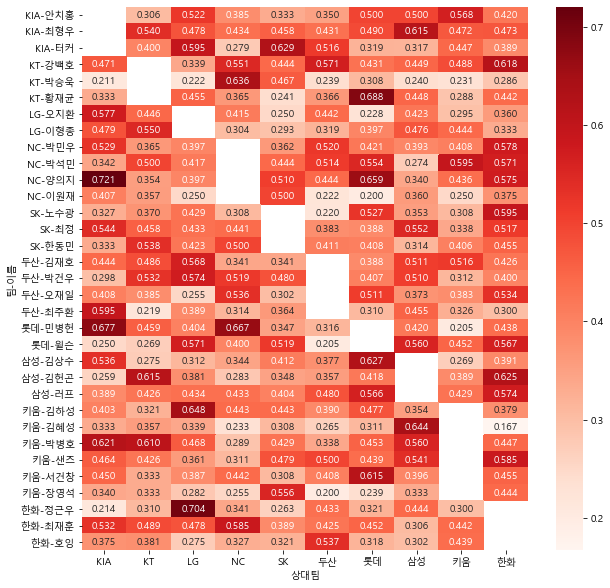

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(top_pivot, annot=True, fmt='.3f',cmap='Reds')

center 옵션을 사용해서 색상의 기준값을 변경할 수 있다.

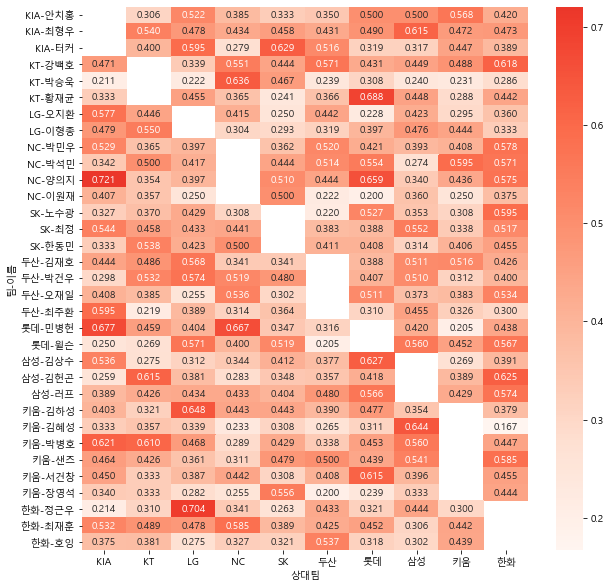

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(top_pivot, annot=True, fmt='.3f',cmap='Reds',center=0.6)